# 예측 모델 실습

### auto-mpg.csv 데이터를 통해,  
### mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon - 연비),

cylinders (실린더 갯수)

engine displacement (inches 배기량),

horsepower (마력),

vehicle weight (lbs. 무게),

time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간),

model year ,

origin of car (1. American,   2. European,   3. Japanese).

Also provided are the car labels (types)



In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [314]:
df = pd.read_csv('../data/auto-mpg.csv')

In [315]:
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [316]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [317]:
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [318]:
y = df['mpg']

In [319]:
X = df.loc[ :  , 'cyl' : 'origin'   ]

In [320]:
X.head(3)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1


In [321]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     392 non-null    int64  
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   yr      392 non-null    int64  
 6   origin  392 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 21.6 KB


In [322]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [323]:
from sklearn.model_selection  import train_test_split

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [325]:
X_train.shape

(313, 7)

In [326]:
X_test.shape

(79, 7)

In [327]:
from sklearn.linear_model import LinearRegression

In [328]:
regressor = LinearRegression()

In [329]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [330]:
X_train

,cyl,displ,hp,weight,accel,yr,origin
365,4,112.0,85,2575,16.2,82,1
125,6,232.0,100,2901,16.0,74,1
362,4,112.0,88,2605,19.6,82,1
291,4,89.0,71,1925,14.0,79,2
126,6,250.0,100,3336,17.0,74,1
...,...,...,...,...,...,...,...
129,4,71.0,65,1836,21.0,74,3
145,4,90.0,75,2108,15.5,74,2
343,4,85.0,65,1975,19.4,81,3
192,6,232.0,90,3085,17.6,76,1


In [331]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [332]:
X_test.head(3)

,cyl,displ,hp,weight,accel,yr,origin
388,4,97.0,52,2130,24.6,82,2
179,4,91.0,53,1795,17.5,75,3
292,4,86.0,65,1975,15.2,79,3


In [333]:
y_pred = regressor.predict(X_test)

In [334]:
y_pred

array([33.77637511, 32.03002602, 33.46916321, 16.46658529, 27.04246221,
       36.23268309, 21.84654564,  7.40882559, 24.30017362, 32.85068434,
       23.29907663, 11.48360071, 30.74519914, 24.20686942, 15.2416448 ,
       27.91866465, 30.92615813, 26.47153432, 29.81434677, 14.94740617,
       22.84369014, 23.6860258 , 18.84233189, 12.13696003, 24.39136642,
       26.04794718, 19.99742236, 21.17515858, 35.75628988, 32.75315201,
       26.7418266 , 34.39403901, 22.93639089, 10.971734  , 30.10291751,
       31.0906723 , 31.19541007, 26.75046042, 13.38573253, 20.31549299,
       23.59558341, 19.69359091, 29.26406708, 25.16933883, 29.00232429,
       14.88468425, 25.89330742, 23.260891  , 17.54134266, 23.33460275,
       17.99556829, 14.68236867, 33.36062646, 17.3473357 , 21.0875401 ,
       22.41629019, 11.80917877, 31.4780056 , 26.39413937, 28.36688952,
       19.07050311, 21.96364778, 25.97957503, 19.90336795, 10.83521095,
       16.01838471, 25.48087867, 12.75771163, 20.80404127, 26.71

In [335]:
y_test

388    44.0
179    33.0
292    34.1
211    13.0
19     26.0
       ... 
104    13.0
152    15.0
226    18.5
248    19.4
111    19.0
Name: mpg, Length: 79, dtype: float64

In [336]:
((y_test - y_pred) ** 2).mean()  # MSE 

np.float64(12.440699176751934)

In [337]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [338]:
mean_squared_error(y_test, y_pred)

12.440699176751934

In [339]:
root_mean_squared_error(y_test, y_pred)

3.5271375330077412

In [340]:
mean_absolute_error(y_test, y_pred)

2.5840040608985864

In [341]:
r2_score(y_test, y_pred) # 0~1 사이의 값으로 나오는데, 1로 나올수록 성능이 좋다.

0.7893105393729919

In [342]:
df_test = y_test.to_frame().reset_index(drop= True)

In [343]:
df_test['y_pred'] = y_pred

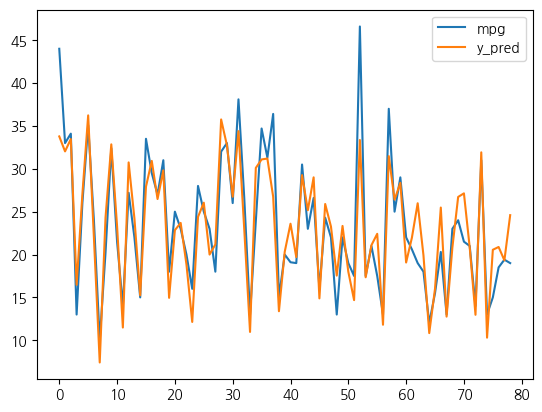

In [344]:
df_test.plot()
plt.show()

In [345]:
y_test.values

array([44. , 33. , 34.1, 13. , 26. , 35.1, 23.9, 10. , 20.2, 32.4, 21.5,
       14. , 27.2, 22. , 15. , 33.5, 29.5, 27. , 31. , 18. , 25. , 23. ,
       20. , 16. , 28. , 25. , 23. , 18. , 32. , 33. , 26. , 38.1, 26.6,
       13. , 23.9, 34.7, 31.3, 36.4, 15. , 20. , 19.1, 19. , 30.5, 23. ,
       26.6, 16. , 24.3, 22. , 13. , 22. , 19. , 17.5, 46.6, 17.5, 21. ,
       17.5, 13. , 37. , 25. , 29. , 22. , 20.6, 19. , 18. , 12. , 15.5,
       20.3, 13. , 23. , 24. , 21.5, 21. , 14. , 31. , 13. , 15. , 18.5,
       19.4, 19. ])

In [346]:
y_pred

array([33.77637511, 32.03002602, 33.46916321, 16.46658529, 27.04246221,
       36.23268309, 21.84654564,  7.40882559, 24.30017362, 32.85068434,
       23.29907663, 11.48360071, 30.74519914, 24.20686942, 15.2416448 ,
       27.91866465, 30.92615813, 26.47153432, 29.81434677, 14.94740617,
       22.84369014, 23.6860258 , 18.84233189, 12.13696003, 24.39136642,
       26.04794718, 19.99742236, 21.17515858, 35.75628988, 32.75315201,
       26.7418266 , 34.39403901, 22.93639089, 10.971734  , 30.10291751,
       31.0906723 , 31.19541007, 26.75046042, 13.38573253, 20.31549299,
       23.59558341, 19.69359091, 29.26406708, 25.16933883, 29.00232429,
       14.88468425, 25.89330742, 23.260891  , 17.54134266, 23.33460275,
       17.99556829, 14.68236867, 33.36062646, 17.3473357 , 21.0875401 ,
       22.41629019, 11.80917877, 31.4780056 , 26.39413937, 28.36688952,
       19.07050311, 21.96364778, 25.97957503, 19.90336795, 10.83521095,
       16.01838471, 25.48087867, 12.75771163, 20.80404127, 26.71

In [347]:
y_test.values

array([44. , 33. , 34.1, 13. , 26. , 35.1, 23.9, 10. , 20.2, 32.4, 21.5,
       14. , 27.2, 22. , 15. , 33.5, 29.5, 27. , 31. , 18. , 25. , 23. ,
       20. , 16. , 28. , 25. , 23. , 18. , 32. , 33. , 26. , 38.1, 26.6,
       13. , 23.9, 34.7, 31.3, 36.4, 15. , 20. , 19.1, 19. , 30.5, 23. ,
       26.6, 16. , 24.3, 22. , 13. , 22. , 19. , 17.5, 46.6, 17.5, 21. ,
       17.5, 13. , 37. , 25. , 29. , 22. , 20.6, 19. , 18. , 12. , 15.5,
       20.3, 13. , 23. , 24. , 21.5, 21. , 14. , 31. , 13. , 15. , 18.5,
       19.4, 19. ])

In [348]:
y_pred

array([33.77637511, 32.03002602, 33.46916321, 16.46658529, 27.04246221,
       36.23268309, 21.84654564,  7.40882559, 24.30017362, 32.85068434,
       23.29907663, 11.48360071, 30.74519914, 24.20686942, 15.2416448 ,
       27.91866465, 30.92615813, 26.47153432, 29.81434677, 14.94740617,
       22.84369014, 23.6860258 , 18.84233189, 12.13696003, 24.39136642,
       26.04794718, 19.99742236, 21.17515858, 35.75628988, 32.75315201,
       26.7418266 , 34.39403901, 22.93639089, 10.971734  , 30.10291751,
       31.0906723 , 31.19541007, 26.75046042, 13.38573253, 20.31549299,
       23.59558341, 19.69359091, 29.26406708, 25.16933883, 29.00232429,
       14.88468425, 25.89330742, 23.260891  , 17.54134266, 23.33460275,
       17.99556829, 14.68236867, 33.36062646, 17.3473357 , 21.0875401 ,
       22.41629019, 11.80917877, 31.4780056 , 26.39413937, 28.36688952,
       19.07050311, 21.96364778, 25.97957503, 19.90336795, 10.83521095,
       16.01838471, 25.48087867, 12.75771163, 20.80404127, 26.71

In [349]:
from koreanize_matplotlib import koreanize
koreanize()

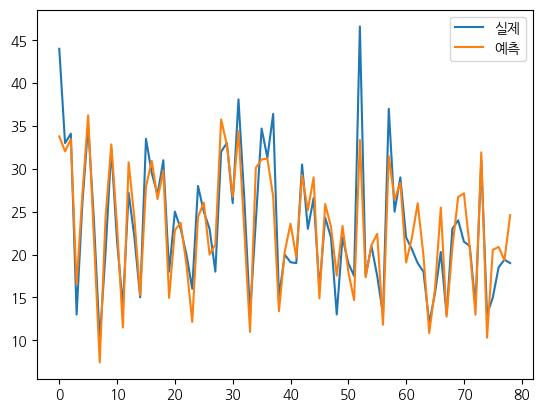

In [350]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['실제', '예측'])
plt.show()

In [351]:
df = pd.read_csv('../data/ecommerce.csv', index_col= 0)

In [352]:
df

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210
2,2,0,42,19364,26016,1,207
3,3,0,49,23621,23335,1,220
4,4,0,83,24431,27068,1,201
...,...,...,...,...,...,...,...
360,3,0,65,24232,24854,1,224
361,4,0,95,21161,21804,1,372
362,5,0,23,22293,23212,1,206
363,6,0,99,24797,25393,1,262


In [353]:
df['IsHoliday'].unique()

array([0, 1])

In [354]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [355]:
df.describe()

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.991781,0.150685,54.030137,21989.027397,24136.219178,6.424658,232.358904
std,2.006155,0.358233,26.246542,1691.546551,2312.538599,3.492212,68.458136
min,0.000000,0.000000,10.000000,19003.000000,20038.000000,1.000000,61.000000
25%,1.000000,0.000000,32.000000,20673.000000,22322.000000,3.000000,191.000000
50%,3.000000,0.000000,55.000000,21872.000000,24150.000000,6.000000,225.000000
75%,5.000000,0.000000,76.000000,23422.000000,26097.000000,9.000000,279.000000
max,6.000000,1.000000,99.000000,24996.000000,27992.000000,12.000000,407.000000


## 상관관계분석

In [356]:
df.corr()

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
DayOfWeek,1.000000,-0.101485,-0.027126,0.058028,0.054830,-0.001853,-0.076832
IsHoliday,-0.101485,1.000000,0.007405,-0.042057,-0.034416,-0.009566,0.121911
MarketingSpend,-0.027126,0.007405,1.000000,0.024803,-0.041695,0.012718,0.582831
CompetitorPrice,0.058028,-0.042057,0.024803,1.000000,0.066226,0.033093,-0.297661
Price,0.054830,-0.034416,-0.041695,0.066226,1.000000,-0.078575,-0.703286
Month,-0.001853,-0.009566,0.012718,0.033093,-0.078575,1.000000,-0.185007
Sales,-0.076832,0.121911,0.582831,-0.297661,-0.703286,-0.185007,1.000000


In [357]:
df[ ['IsHoliday','MarketingSpend'] ].corr()

,IsHoliday,MarketingSpend
IsHoliday,1.000000,0.007405
MarketingSpend,0.007405,1.000000


In [358]:
df[ ['IsHoliday' , 'Sales'] ].corr()

,IsHoliday,Sales
IsHoliday,1.000000,0.121911
Sales,0.121911,1.000000


In [359]:
df[ ['Price', 'CompetitorPrice' , 'Sales' ] ].corr()

,Price,CompetitorPrice,Sales
Price,1.000000,0.066226,-0.703286
CompetitorPrice,0.066226,1.000000,-0.297661
Sales,-0.703286,-0.297661,1.000000


In [360]:
# 파이차트? 퍼센테이지로 나타내고 싶을때

In [361]:
# 두 컬럼간의 관계? 스케터

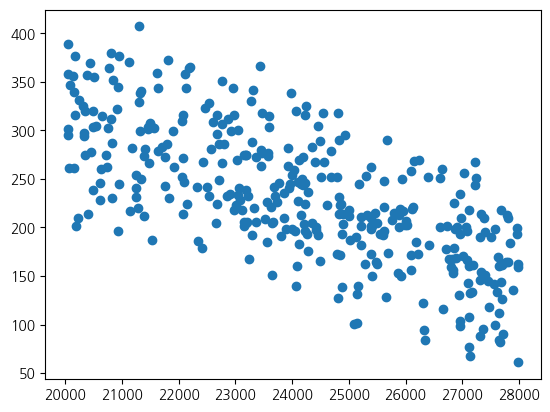

In [362]:
plt.scatter(data= df, x='Price', y='Sales')
plt.show()

In [363]:
df[['Price', 'Sales']].corr()

,Price,Sales
Price,1.000000,-0.703286
Sales,-0.703286,1.000000


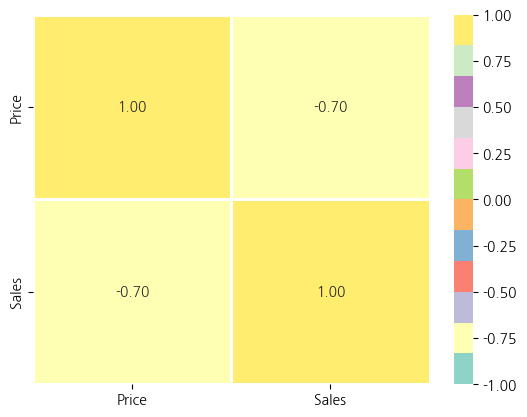

In [364]:
sb.heatmap(data= df[['Price', 'Sales']].corr(), linewidths=0.8, vmin=-1, vmax= 1, cmap='Set3',
          annot=True, fmt='.2f')
plt.show()

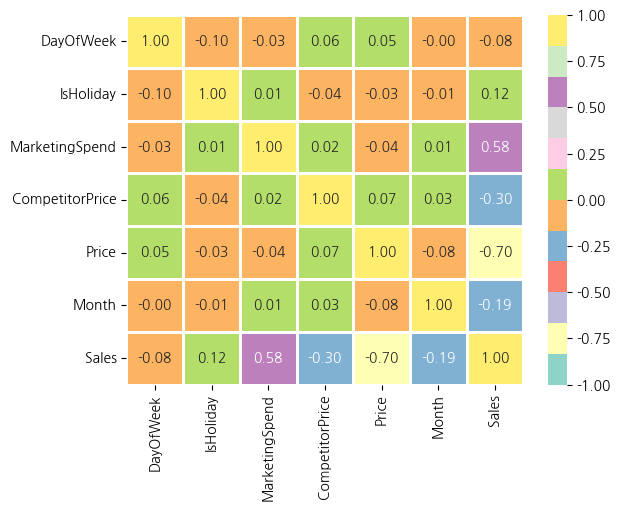

In [365]:
sb.heatmap(data= df.corr(), linewidths=0.8, vmin=-1, vmax= 1, cmap='Set3',
          annot=True, fmt='.2f')
plt.show()

In [366]:
df

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210
2,2,0,42,19364,26016,1,207
3,3,0,49,23621,23335,1,220
4,4,0,83,24431,27068,1,201
...,...,...,...,...,...,...,...
360,3,0,65,24232,24854,1,224
361,4,0,95,21161,21804,1,372
362,5,0,23,22293,23212,1,206
363,6,0,99,24797,25393,1,262


## 매출을 예측하는 인공지능을 만들자

In [367]:
df.isna().sum()

DayOfWeek          0
IsHoliday          0
MarketingSpend     0
CompetitorPrice    0
Price              0
Month              0
Sales              0
dtype: int64

In [368]:
df.head(3)

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210
2,2,0,42,19364,26016,1,207


In [369]:
y = df['Sales']

In [370]:
X = df.drop('Sales', axis = 1)

In [371]:
X.head(3)

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month
0,0,0,76,21125,24926,1
1,1,1,74,22287,27811,1
2,2,0,42,19364,26016,1


In [372]:
y.head(2)

0    295
1    210
Name: Sales, dtype: int64

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [374]:
regressor = LinearRegression()

In [375]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [376]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [377]:
y_pred = regressor.predict(X_test)

In [378]:
y_pred

array([195.12002963, 310.49511662, 205.6803002 , 216.8041213 ,
       140.06206307, 252.14629705, 209.77387541, 312.72417214,
       224.78969725, 288.67618767, 278.65498872, 137.57168852,
       255.56700907, 380.85379852, 327.02828201, 220.94795245,
       193.35257925, 320.37883518, 198.5423998 , 152.4606588 ,
       215.50073224, 180.60694216, 286.59256277, 226.3424661 ,
       191.72164113, 308.37650298,  93.81570465, 302.46533644,
       247.74293986, 146.74035352, 160.530029  , 300.71724371,
       176.82270554,  66.28831408, 244.28408682, 258.59756397,
        83.36751113, 310.41488624, 233.16057841, 264.51536003,
       178.25559621, 238.88527182, 199.26827134, 233.27883966,
       252.46992497, 265.98117436, 211.33055869, 276.72640077,
       144.60607893, 296.97296896, 250.97669867, 231.02672474,
       255.79035432, 181.06628437, 141.96549013, 180.79623584,
       213.69095353, 235.31985072, 309.90585482, 164.12370447,
       142.66904684, 362.0122242 , 131.01606204, 333.11

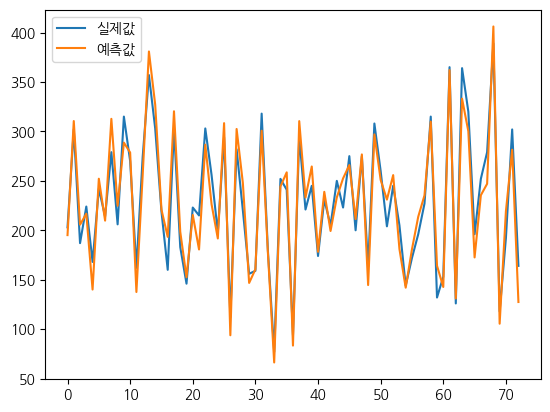

In [379]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend( ['실제값', '예측값'] )
plt.show()

In [380]:
from sklearn.metrics import mean_squared_error, r2_score

In [381]:
mean_squared_error(y_test, y_pred)

337.27560029750316

In [382]:
r2_score(y_test, y_pred)

0.9258699785535889

## 지금까지는 LinearRegression 을 했다.
## 리그레션에 많이 사용하는 2가지 더 알아보자.
## RandomForest, XGBoost 

In [383]:
from sklearn.ensemble import RandomForestRegressor

In [384]:
regressor2 = RandomForestRegressor(n_estimators= 500 , random_state= 7  )

In [385]:
regressor2.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [386]:
y_pred2 = regressor2.predict(X_test)

In [387]:
# 실제값과 리니어리그레션 예측값과 랜덤포레스트의 예측값을 전부 합쳐서 보자.

In [388]:
df_test = y_test.to_frame().reset_index(drop=True)

In [389]:
df_test['linear'] = y_pred

In [390]:
df_test['random'] = y_pred2

In [391]:
df_test

,Sales,linear,random
0,203,195.120030,205.504
1,302,310.495117,302.884
2,187,205.680300,210.818
3,224,216.804121,230.326
4,168,140.062063,202.924
...,...,...,...
68,389,406.143256,362.214
69,118,105.495257,111.644
70,192,219.123457,224.524
71,302,281.498499,255.972


In [392]:
# 리니어리그레션
mean_squared_error(y_test, y_pred)

337.27560029750316

In [393]:
# 랜덤포레스트
mean_squared_error(y_test, y_pred2)

483.0290815890411

In [394]:
r2_score(y_test, y_pred)

0.9258699785535889

In [395]:
r2_score(y_test, y_pred2)

0.8938347270130085

In [396]:
! pip install xgboost

In [397]:
from xgboost import XGBRegressor

In [398]:
regressor3 = XGBRegressor(n_estimators = 100,  random_state=7)

In [399]:
regressor3.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [400]:
y_pred3 = regressor3.predict(X_test)

In [401]:
# 데이터프레임에 합쳐보자
df_test['xboost'] = y_pred3

In [402]:
df_test

,Sales,linear,random,xboost
0,203,195.120030,205.504,204.854340
1,302,310.495117,302.884,313.083588
2,187,205.680300,210.818,202.806931
3,224,216.804121,230.326,220.195328
4,168,140.062063,202.924,202.798325
...,...,...,...,...
68,389,406.143256,362.214,370.195404
69,118,105.495257,111.644,83.094604
70,192,219.123457,224.524,209.302643
71,302,281.498499,255.972,257.065369


In [403]:
mean_squared_error(y_test, y_pred)

337.27560029750316

In [404]:
mean_squared_error(y_test, y_pred2)

483.0290815890411

In [405]:
mean_squared_error(y_test, y_pred3)

411.6759033203125

In [406]:
r2_score(y_test, y_pred)

0.9258699785535889

In [407]:
r2_score(y_test, y_pred2)

0.8938347270130085

In [408]:
r2_score(y_test, y_pred3)

0.9095174670219421

In [409]:
# 파이프라이닝, 그리드서치 

In [410]:
df = pd.read_csv('../data/healthcare.csv', index_col= 0)

In [411]:
df.head()

,Age,Gender,BMI,Region,Smoker,NumVisits,InsuranceClaim
0,51.0,Female,NaN,South,No,19.0,70.081987
1,92.0,Female,38.074006,West,Yes,13.0,92.747518
2,14.0,Male,NaN,North,No,8.0,46.794138
3,NaN,Female,27.020924,West,No,7.0,44.789132
4,60.0,Male,37.961368,North,No,16.0,71.790344


In [412]:
df.isna().sum()

Age               30
Gender             0
BMI               50
Region             0
Smoker             0
NumVisits         20
InsuranceClaim     0
dtype: int64

In [413]:
df.dropna(inplace=True)

In [414]:
df.isna().sum()

Age               0
Gender            0
BMI               0
Region            0
Smoker            0
NumVisits         0
InsuranceClaim    0
dtype: int64

In [415]:
df.shape

(407, 7)

In [416]:
df.head()

,Age,Gender,BMI,Region,Smoker,NumVisits,InsuranceClaim
1,92.0,Female,38.074006,West,Yes,13.0,92.747518
4,60.0,Male,37.961368,North,No,16.0,71.790344
5,20.0,Female,29.676706,East,No,1.0,39.417650
6,82.0,Male,15.821167,North,No,2.0,57.164211
7,86.0,Male,37.818737,East,No,7.0,70.191544


In [417]:
y = df['InsuranceClaim']

In [418]:
X = df.drop('InsuranceClaim', axis = 1)

In [419]:
X.head(3)

,Age,Gender,BMI,Region,Smoker,NumVisits
1,92.0,Female,38.074006,West,Yes,13.0
4,60.0,Male,37.961368,North,No,16.0
5,20.0,Female,29.676706,East,No,1.0


In [420]:
y.head(3)

1    92.747518
4    71.790344
5    39.417650
Name: InsuranceClaim, dtype: float64

In [421]:
sorted( df['Gender'].unique() )

['Female', 'Male']

In [422]:
sorted( df['Region'].unique() )

['East', 'North', 'South', 'West']

In [423]:
sorted( df['Smoker'].unique() )

['No', 'Yes']

In [424]:
# 파이프라이닝

In [425]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler

In [426]:
from sklearn.compose import ColumnTransformer

In [427]:
ct = ColumnTransformer([('label', OrdinalEncoder(), [1,4]) ,
                        ('onehot', OneHotEncoder(), [3]) ,
                        ('scaler', MinMaxScaler(), [0, 2, 5] )])

In [428]:
regressor = LinearRegression()

In [429]:
from sklearn.pipeline import Pipeline

In [430]:
pipe = Pipeline(  steps= [ ("preprocessing" , ct  ) ,
                           ("regressor" , regressor ) ]  )

In [431]:
X.head(2)

,Age,Gender,BMI,Region,Smoker,NumVisits
1,92.0,Female,38.074006,West,Yes,13.0
4,60.0,Male,37.961368,North,No,16.0


In [432]:
y.head(2)

1    92.747518
4    71.790344
Name: InsuranceClaim, dtype: float64

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [434]:
X_train.head(2)

,Age,Gender,BMI,Region,Smoker,NumVisits
435,14.0,Female,23.148137,South,No,16.0
123,4.0,Male,21.662460,West,No,1.0


In [435]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('label', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [436]:
y_pred = pipe.predict(X_test)

In [437]:
y_pred

array([60.48179805, 63.44516252, 70.611469  , 75.50964392, 53.63202614,
       75.92428158, 68.23389507, 60.745702  , 57.88668667, 77.3705967 ,
       62.32608181, 48.07742276, 72.88405212, 58.57231464, 73.48760367,
       54.7762362 , 64.18756789, 34.58433538, 48.10909232, 52.75001431,
       62.85027794, 56.5074751 , 56.82426901, 64.14919401, 59.0861962 ,
       79.7081743 , 63.23824524, 66.16196108, 86.89309729, 50.84820087,
       51.46942912, 83.65905403, 47.35463392, 56.30942085, 59.36965568,
       66.29350362, 45.91499134, 59.82016783, 69.97794308, 50.9048794 ,
       50.0260105 , 74.82448634, 60.18005206, 60.80523452, 61.73678859,
       45.86720029, 74.87528696, 62.71868922, 73.6312923 , 42.41557012,
       61.43212545, 58.87826111, 39.776723  , 50.00651981, 51.54248203,
       71.51084195, 56.33379702, 69.57272917, 69.37206007, 70.10244501,
       78.16562373, 40.30721566, 81.29297702, 55.47194826, 74.71648172,
       83.37170417, 52.45509128, 50.98171809, 53.66206206, 65.75

In [438]:
import joblib

In [439]:
joblib.dump(pipe, 'pipe.pkl')

['pipe.pkl']

In [440]:
pipe2 = joblib.load('pipe.pkl')

## 새로운 사람의 데이터가 있을때, 보험금 수령액을 예측하려 한다.
## 나이는 45세, 남자이고, BMI 는 28.5, 지역은 South 에 살고, 담배를 피며, 년간 병원 방문 횟수는 12회

In [441]:
data = [ { 'Age' : 45 , 'Gender' : 'Male', 'BMI' : 28.5, 'Region':'South', 'Smoker':'Yes', 'NumVisits':12  } ]

In [442]:
new_data = pd.DataFrame(data)

In [443]:
new_data

,Age,Gender,BMI,Region,Smoker,NumVisits
0,45,Male,28.5,South,Yes,12


In [444]:
pipe2.predict(new_data)

array([69.93560068])

In [445]:
from sklearn.ensemble import RandomForestRegressor

In [446]:
# 그리드 서치를 적용 grid search 

In [447]:
regressor2 = RandomForestRegressor(random_state= 7)

In [448]:
pipe = Pipeline( [ ( 'preprocessing', ct ) ,
                   ( 'regressor2', regressor2  )] )

In [449]:
param_grid = { 'regressor2__n_estimators' : [ 50, 100, 200, 300, 400 ] ,
               'regressor2__max_depth' : [None, 10, 20, 30],
               'regressor2__min_samples_split' : [2, 5, 10],
               'regressor2__min_samples_leaf' : [1, 2, 4]}

In [450]:
from sklearn.model_selection import GridSearchCV

In [451]:
grid_search = GridSearchCV( pipe, param_grid, scoring='neg_mean_squared_error', cv=10,
                          verbose=2)

In [452]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None

,estimator,Pipeline(step...om_state=7))])
,param_grid,"{'regressor2__max_depth': [None, 10, ...], 'regressor2__min_samples_leaf': [1, 2, ...], 'regressor2__min_samples_split': [2, 5, ...], 'regressor2__n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('label', ...), ('onehot', ...), ...]"


최적의 파라미터와, 성능을 확인하자.

In [302]:
grid_search.best_params_

{'regressor2__max_depth': None,
 'regressor2__min_samples_leaf': 1,
 'regressor2__min_samples_split': 5,
 'regressor2__n_estimators': 200}

In [304]:
grid_search.best_score_

np.float64(-35.56383739500035)

In [306]:
best_regressor = grid_search.best_estimator_

In [307]:
y_pred = best_regressor.predict(X_test)

In [308]:
mean_squared_error(y_test, y_pred)

39.21896662777554

In [309]:
r2_score(y_test, y_pred)

0.7564181823900007

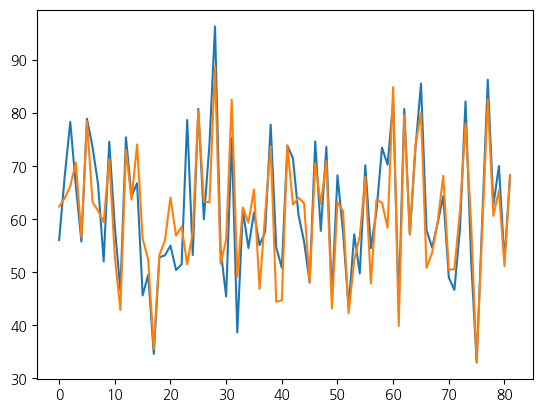

In [312]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.show()

### 리그레션문제는, 리니어리그레션, 랜덤포레스트, XG부스트를 이용하면 된다.